# Luke

In [2]:
import pandas as pd
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

In [3]:
df

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2015849,May 26 2021,Illinois,Chicago,7200 block of S Princeton Ave,0,4
1,2015730,May 26 2021,California,San Jose,101 W Younger Ave,10,0
2,2014343,May 24 2021,Michigan,Inkster,27000 block of Rosewood St,2,2
3,2014381,May 24 2021,Ohio,West Jefferson,127 Jackson St,4,0
4,2012971,May 23 2021,Illinois,Chicago,3344 W Ohio St,0,4
...,...,...,...,...,...,...,...
2925,95550,January 12 2014,Alabama,Huntsville,University Drive,0,5
2926,95146,January 11 2014,Mississippi,Jackson,3430 W. Capitol Street,0,4
2927,94514,January 5 2014,Pennsylvania,Erie,829 Parade St,1,3
2928,92704,January 3 2014,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3


<AxesSubplot:xlabel='incident_date'>

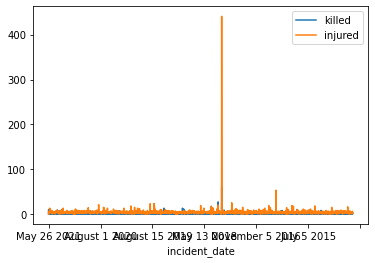

In [3]:
df.plot(x='incident_date', y=['killed','injured'])

Looking at a plot of killed and injured over incident_date shows multiple outliers with killed having a max of 59 and injured haveing a max of 441. These will have to be looked at and possibly removed. incident_date may also need to be simplified and split into years or months.

<AxesSubplot:xlabel='state', ylabel='killed'>

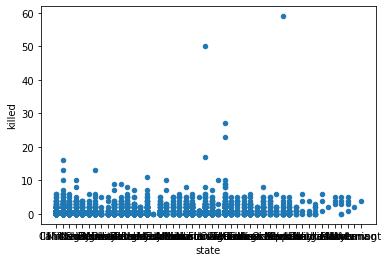

In [4]:
df.plot(kind='scatter', x='state', y='killed')

In [55]:
import pandas as pd
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


def clean_month(row):
    
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0]
    # Clean dataframe
    
def clean_year(row):
    
    years = ['2014','2015','2016','2017','2018','2019','2020','2021','2022'] 
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])
    # Clean dataframe
   
    
def clean_df(playlist):
    df_cleaned = df.copy()
    
    #split incident_date into two new columns named 'month' and 'year'
    #month column for more general info and for possible research question on violence per month
    #year column required for possible questions and to remove incomplete years
    df_cleaned['month'] = df_cleaned.apply(lambda row: clean_month(row), axis=1)
    df_cleaned['year'] = df_cleaned.apply(lambda row: clean_year(row), axis=1)
    df_cleaned = df_cleaned.drop(['incident_id','address','city_or_county','incident_date'], axis=1)
    
    #remove outliers
    #df_cleaned = df_cleaned[df_cleaned['killed'] < 50]
    #df_cleaned = df_cleaned[df_cleaned['injured'] < 50]
    df_cleaned = df_cleaned[df_cleaned['year'] < 2021]

    #rearrange columns
    df_cleaned = df_cleaned[['year','month','state','killed','injured']]
    return df_cleaned# Get df with reclassfied 'condition' column

df_cleaned = clean_df(df)


<AxesSubplot:xlabel='months'>

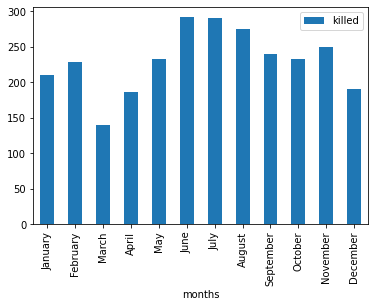

In [32]:
## df_january = df_cleaned[df_cleaned['month'] == 'January']

def sum_month(df, col):

    months = ['January','February','March','April','May','June','July','August','September','October','November','December']

    df_mv = pd.DataFrame(months, columns=['months'])#creates new dataframe holding a row for each month

    for m in months:
        df_mv.at[months.index(m), col] = df[df['month'] == m][col].sum()
    return df_mv


df_monthsKilled = sum_month(df_cleaned, "killed")
df_monthsKilled.plot(kind = 'bar', x = 'months', y = 'killed')

<AxesSubplot:xlabel='months'>

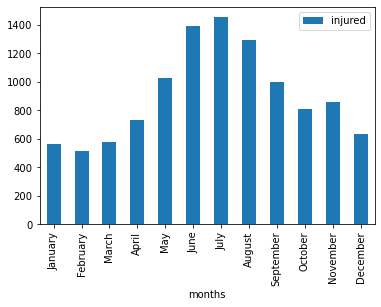

In [33]:
df_monthsInjured = sum_month(df_cleaned, "injured")
df_monthsInjured.plot(kind = 'bar', x = 'months', y = 'injured')

The previous two bar graphs show the total number of deaths and injuries that occured each month from the year 2014 till 2020. Over the course of those 6 years the majority of instances occured during the summer months, from june to august. We can also look at the number of killed and/or injured in each state.

<AxesSubplot:xlabel='state'>

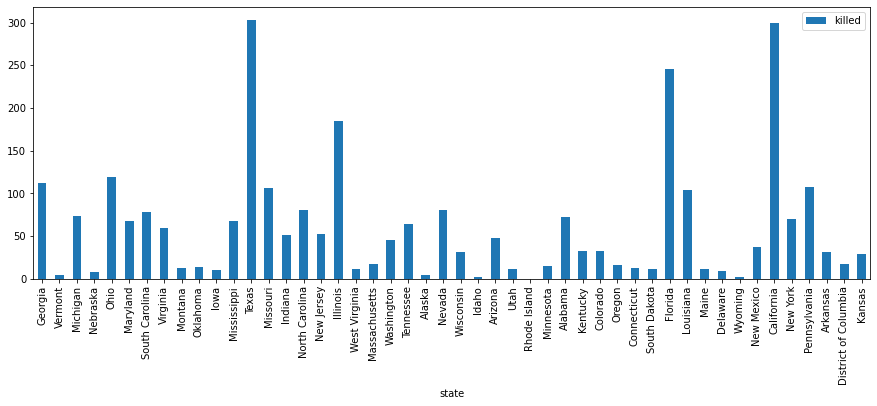

In [60]:
def sum_state(df, col):

    states = df_cleaned['state'].tolist()
    states = set(states)
    states = list(states)

    df_sv = pd.DataFrame(states, columns=['state'])#creates new dataframe holding a row for each month

    for s in states:
        df_sv.at[states.index(s), col] = df[df['state'] == s][col].sum()
    return df_sv


df_statesKilled = sum_state(df_cleaned, "killed")
df_statesKilled.plot(kind = 'bar', x = 'state', y = 'killed', figsize=(15,5))

In [35]:
df_statesKilled

,state,killed
0,Georgia,112.0
1,Vermont,4.0
2,Michigan,73.0
3,Nebraska,8.0
4,Ohio,119.0
5,Maryland,68.0
6,South Carolina,78.0
7,Virginia,60.0
8,Montana,13.0
9,Oklahoma,14.0


This table show the number of gun deaths in each state over the 6 years, with the lowest being Rhode Island having zero gun deaths and Texas having a total of 303 gun deaths over 6 years.

In [29]:
df.nunique(axis=0)

incident_id       2930
incident_date     1571
state               48
city_or_county     861
address           2903
killed              19
injured             26
dtype: int64

After looking at the above data showing the total number of deaths in each state from 2014 till 2020, while this should have been noticed before, but there are only 47 of the 50 US states plus the district of columbia in this data set and appears to be missing Hawaii, New Hampshire, and North Dakota. This will need to be noted when looking at the states of the US. District of Columbia may need to be removed from the dataset if looking specifically at the states. 

<AxesSubplot:xlabel='state'>

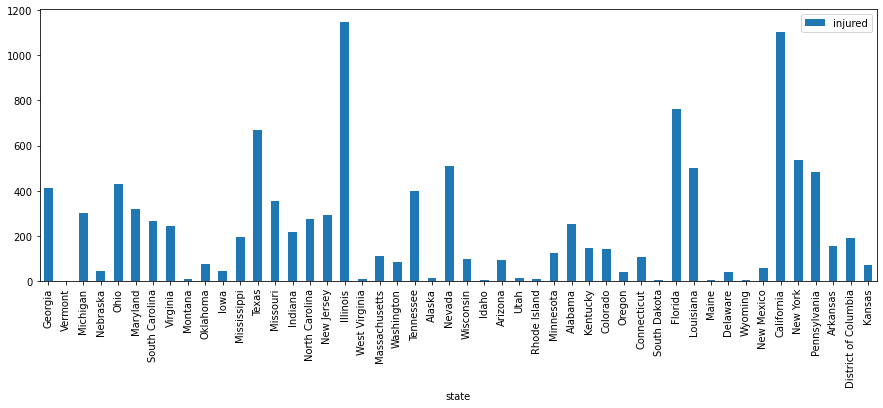

In [59]:
df_statesInjured = sum_state(df_cleaned, "injured")
df_statesInjured.plot(kind = 'bar', x = 'state', y = 'injured', figsize=(15,5))

In [38]:
df_statesInjured

,state,injured
0,Georgia,413.0
1,Vermont,0.0
2,Michigan,300.0
3,Nebraska,42.0
4,Ohio,429.0
5,Maryland,319.0
6,South Carolina,264.0
7,Virginia,245.0
8,Montana,6.0
9,Oklahoma,76.0


Looking at the number of injured in each state the lowest number is Vermont, however this state did have 2 deaths in the previouse table, while Rhode Island, with 0 deaths, has 9 injured from 2014 till 2020, and the state with the most injured is Illinois with 1148 total injured.

In [25]:
df_states = pd.merge(df_statesKilled, df_statesInjured,how='outer')
df_states.plot.bar(x='state', y=['killed','injured'],figsize=(15,5))

NameError: name 'df_statesKilled' is not defined

## Research question/interests

Briefly describe your research question or interests here.

I am interested at looking more into the numbers with the deaths and injureies in each state. It will be interesting to see a geographical map of the total incidents, and to see if the states surrounding the "highest violence" state also have a high number of incidents possibly affected by the most violent state. As scene in the above graphs, the shapes of the graph differ slightly between the number of killed and the number of injured. So the geographical maps should differ also showing different clusters of violent states.

# Task 3

In [ ]:
pip install plotly-express

In [1]:
import pandas as pd
import plotly.express as px

from project_functions3 import load_and_process
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
df

,Year,Month,State,Killed,Injured
232,2020,December,Indiana,1,3
233,2020,December,Oregon,0,4
234,2020,December,Illinois,3,3
235,2020,December,Florida,2,2
236,2020,December,Massachusetts,1,5
...,...,...,...,...,...
2925,2014,January,Alabama,0,5
2926,2014,January,Mississippi,0,4
2927,2014,January,Pennsylvania,1,3
2928,2014,January,New York,1,3


In [2]:
from project_functions3 import sum_column
df_summed = sum_column(df, 'State', 'Killed', 'Injured')
df_summed

,State,Killed,Injured,State_Code
47,Alabama,72.0,252.0,AL
41,Alaska,5.0,14.0,AK
20,Arizona,48.0,94.0,AZ
10,Arkansas,31.0,153.0,AR
5,California,300.0,1102.0,CA
24,Colorado,32.0,141.0,CO
40,Connecticut,13.0,105.0,CT
22,Delaware,9.0,39.0,DE
36,District of Columbia,17.0,192.0,DC
35,Florida,246.0,761.0,FL


In [11]:
fig = px.choropleth(df_summed,
                    locations='State_Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Killed',
                    color_continuous_scale="hot_r", 
                    hover_name="State",
                    title="Number of Deaths 2014-2016"
                    )
fig.show()

In [12]:
fig = px.choropleth(df_summed,
                    locations='State_Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Injured',
                    color_continuous_scale="hot_r", 
                    hover_name="State",
                    title="Number of Injuries 2014-2016"
                    )
fig.show()